INFO6105 Instructor: Dr. Handan Liu

Homework 5

Grading: total 100 points


In [88]:
#libraries
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

In [58]:
#0
iris = load_iris()


In [59]:
#1
X = iris.data
y = iris.target

In [60]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
scores = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [61]:
#3
m=scores.mean()
m

0.9666666666666668

In [62]:
#4
krange = range(1, 50)
kscore = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    kscore.append(scores.mean())
ks=kscores
print(ks)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9400000000000001, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9400000000000001]


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, **kwargs)>

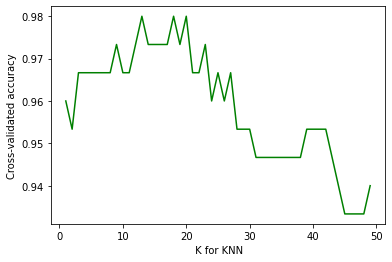

In [63]:
#5
plt.plot(k_range, k_scores,  color="green")
plt.xlabel(' K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title

In [64]:
K=cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
#2
lrg = LogisticRegression( max_iter=120000)
Lr=cross_val_score(lrg, X, y, cv=10, scoring='accuracy').mean()
print(" cross-validation with the best KNN mode",K,'\n',"cross-validation with logistic regression",Lr)

 cross-validation with the best KNN mode 0.9400000000000001 
 cross-validation with logistic regression 0.9733333333333334


In [65]:
#0
df=pd.read_csv("advertising.csv")
print(df.head())
print(df.keys())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [66]:
#1
f_list = ['TV', 'Radio', 'Newspaper']
print(f_list)

['TV', 'Radio', 'Newspaper']


In [67]:
#2
X = df[f_list]
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [68]:
#3
y = df.Sales
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [69]:
#4
lr = LinearRegression()
SC = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')
print(SC)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [70]:
#5
MSC= -SC
print(MSC)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [71]:
#6
RMSC= np.sqrt(MSC)
print(RMSC)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [72]:
#7
meanRMSC=RMSC.mean()
print(meanRMSC)

1.6913531708051797


In [85]:
#8
f_list = ['TV', 'Radio']
X = df[f_list]
cvr=cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')
CVR=-cvr
SQRTCVR=np.sqrt(CVR)
MSQRTCVR=SQRTCVR.mean()
print("crossvalidation",cvr,"\n" * 5,"Mean squareroot cross validation:-",MSQRTCVR)


crossvalidation [-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ] 




 Mean squareroot cross validation:- 1.6796748419090766


In [40]:
#1
bcr=load_breast_cancer()
print(bcr.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [45]:
#1.2
x=bcr.target_names
y=bcr.feature_names
print("target_names:-",x,"\n","feature_names:-",y)

target_names:- ['malignant' 'benign'] 
 feature_names:- ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [48]:
conda install -c anaconda python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [49]:
conda install -c anaconda pydot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [89]:
#2 
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 1/2, random_state=0)
clf = DecisionTreeClassifier(random_state=0,max_depth=4)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred)
print("accuracy score",acc_DT)

accuracy score 0.9263157894736842


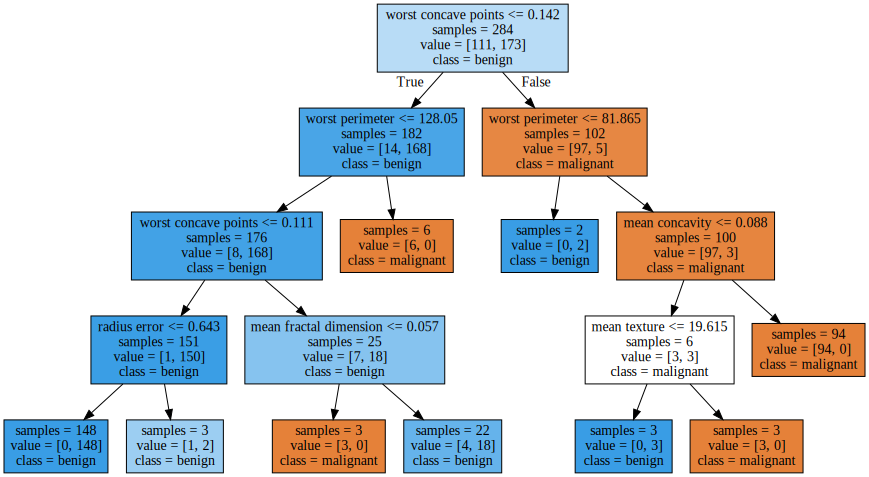

In [91]:
#3
export_graphviz(clf,out_file="decisontree.dot",class_names=['malignant',"benign"],feature_names=bcr.feature_names,impurity=False,filled=True)
import graphviz
with open("decisontree.dot") as dt:
    dtg=dt.read()
graphviz.Source(dtg)